<a href="https://colab.research.google.com/github/jdy5294/Bigdata_Analyst/blob/main/2_1_%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%83%90%EC%83%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. 분석기사 실기 가이드라인

- 제1유형 작업: 데이터 전처리에 필요한 개념 이해 및 코드 구현

- 제2유형 작업: 분석 데이터셋 탐색, 데이터 학습, 분석 모델 생성 및 성능 평가

### 2. 탐색적 데이터 분석 (EDA)
1. 정의: 요약정보, 기초통계, 시각화 등으로 자료 관찰 및 이해
2. 분석 관정 및 절차
      - 분석 목적과 변수의 이름과 특성 확인
      - 데이터의 문제성 (이상치 유무, 분포상의 이상형태) 확인
            - 결측치 대치 방법: 단순대치법, 다중대치법
            - 이상치 대치 방법: 제거, 대체, 유지
      - 데이터의 개별 속성값 분포 확인
      - 데이터 사이의 상관관계 확인

### 3. 파이썬 데이터 탐색

#### 3-1. 타이타닉 데이터셋

In [1]:
# 데이터프레임 살펴보기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# 변수 타입 변환
df['Survived'] = df['Survived'].astype('str')
df['Pclass'] = df['Pclass'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


- describe(): 데이터셋의 수치형 변수에 대해 기초통계량 보여줌
  - include = 'all': 모든 변수에 대한 통계와 분포 보여줌
  - 범주형 변수는 unique(범주의 수), top(가장 많이 출현한 값), freq(가장 많이 출현한 값의 개수) 보여줌

In [4]:
df.describe(include = 'all')

PassengerId Survived Pclass                     Name   Sex  \
count    891.000000      891    891                      891   891   
unique          NaN        2      3                      891     2   
top             NaN        0      3  Braund, Mr. Owen Harris  male   
freq            NaN      549    491                        1   577   
mean     446.000000      NaN    NaN                      NaN   NaN   
std      257.353842      NaN    NaN                      NaN   NaN   
min        1.000000      NaN    NaN                      NaN   NaN   
25%      223.500000      NaN    NaN                      NaN   NaN   
50%      446.000000      NaN    NaN                      NaN   NaN   
75%      668.500000      NaN    NaN                      NaN   NaN   
max      891.000000      NaN    NaN                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare    Cabin  \
count   714.000000  891.000000  891.000000     891  891.000000      204   
unique         NaN         NaN         NaN     681         NaN      147   
top            NaN         NaN         NaN  347082         NaN  B96 B98   
freq           NaN         NaN         NaN       7         NaN        4   
mean     29.699118    0.523008    0.381594     NaN   32.204208      NaN   
std      14.526497    1.102743    0.806057     NaN   49.693429      NaN   
min       0.420000    0.000000    0.000000     NaN    0.000000      NaN   
25%      20.125000    0.000000    0.000000     NaN    7.910400      NaN   
50%      28.000000    0.000000    0.000000     NaN   14.454200      NaN   
75%      38.000000    1.000000    0.000000     NaN   31.000000      NaN   
max      80.000000    8.000000    6.000000     NaN  512.329200      NaN   

       Embarked  
count       889  
unique        3  
top           S  
freq        644  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

In [5]:
# Pclass 변수 분석
df.groupby('Pclass').size()

Pclass
1    216
2    184
3    491
dtype: int64

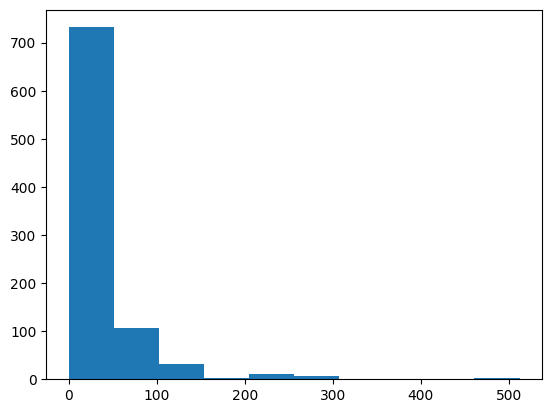

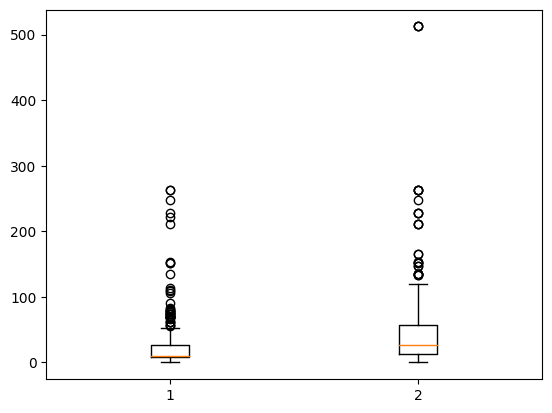

In [6]:
# Fare 변수 분석

# Histogram
plt.hist(df['Fare'])
plt.show()

# Boxplot
data_0 = df[df['Survived']=='0']['Fare']
data_1 = df[df['Survived']=='1']['Fare']

fig, ax = plt.subplots()
ax.boxplot([data_0, data_1])
plt.show()

In [7]:
# Sex 변수 분석

# 빈도수 계산
print(df.groupby('Sex').size(), '\n')

# 여성의 생존 데이터
data_f = df[df['Sex']=='female'].groupby('Survived')
print(data_f.size(), '\n')

# 남성의 생존 데이터
data_f = df[df['Sex']=='male'].groupby('Survived')
print(data_f.size(), '\n')

Sex
female    314
male      577
dtype: int64 

Survived
0     81
1    233
dtype: int64 

Survived
0    468
1    109
dtype: int64 

